# bouncing_ball - Example 3

From the example [Simulation of a Bouncing Ball](https://www.mathworks.com/help/simulink/slref/simulation-of-a-bouncing-ball.html) from the Mathworks *creators of Matlab and Simulink software, accelerating the pace of engineering and science*.

![](bouncing_ball.png)

### Python Setup

In [1]:
import ctypes
import os

import pandas as pd
from rtwtypes import *

import matplotlib.pyplot as plt

dll_path = os.path.abspath("bouncing_ball_win64.dll")
dll = ctypes.windll.LoadLibrary(dll_path)
# Model entry point functions
model_initialize = dll.bouncing_ball_initialize
model_step = dll.bouncing_ball_step
model_terminate = dll.bouncing_ball_terminate

# Model Signals
ball_position = real32_T.in_dll(dll, "ball_position")
ball_velocity = real32_T.in_dll(dll, "ball_velocity")
SimTime = real_T.in_dll(dll, "SimTime")
# Model Parameters
coefficient_of_restitution = real32_T.in_dll(dll, "coefficient_of_restitution")
gravitational_constant = real32_T.in_dll(dll, "gravitational_constant")

# Running The Model.

Run the model and store the step, input, output and simulation time to a pandas dataframe.

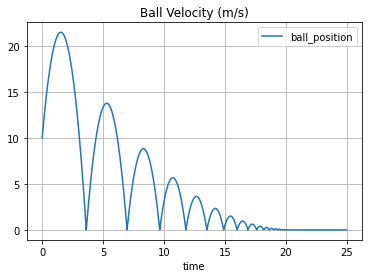

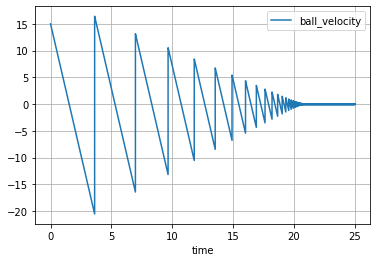

In [2]:
model_initialize()
rows = list()
for step in range(int(25 * 1e3)):
    model_step()
    row_tmp = {
        "time": float(SimTime.value),
        "ball_position": float(ball_position.value),
        "ball_velocity": float(ball_velocity.value),
    }
    rows.append(row_tmp)

df = pd.DataFrame(rows)

df.plot(x="time", y=["ball_position"])
plt.title("Ball Position (m)")
plt.grid('on')
plt.title("Ball Velocity (m/s)")
df.plot(x="time", y=["ball_velocity"])
plt.grid('on')

![](sldemo_bounceExample_02.png)

# Testing Bouncing Balls with different gravity.

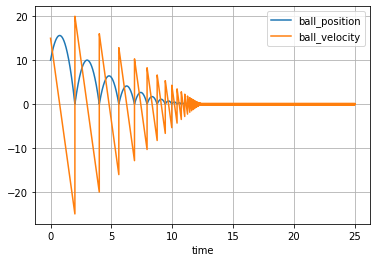

In [3]:
model_initialize()
rows = list()
gravitational_constant.value = -20
for step in range(int(25 * 1e3)):
    model_step()
    row_tmp = {
        "time": float(SimTime.value),
        "ball_position": float(ball_position.value),
        "ball_velocity": float(ball_velocity.value),
    }
    rows.append(row_tmp)

df = pd.DataFrame(rows)

df.plot(x="time", y=["ball_position", "ball_velocity"])
plt.grid('on')

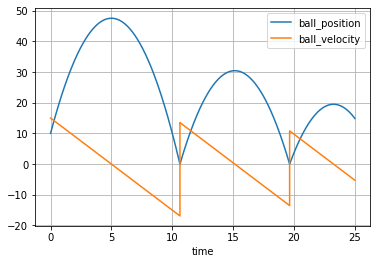

In [4]:
model_initialize()
rows = list()
gravitational_constant.value = -3
for step in range(int(25 * 1e3)):
    model_step()
    row_tmp = {
        "time": float(SimTime.value),
        "ball_position": float(ball_position.value),
        "ball_velocity": float(ball_velocity.value),
    }
    rows.append(row_tmp)

df = pd.DataFrame(rows)

df.plot(x="time", y=["ball_position", "ball_velocity"])
plt.grid('on')